## Importing packages

In [176]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.calibration import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from dateutil.parser import parse
import matplotlib.pyplot as plt


## Data  loading

In [177]:
data = pd.DataFrame(pd.read_csv('Train.csv'))

In [178]:
data

,ID,date,campaign_type,region,customer_age_range,gender,sales,units_sold,clients_engaged,click_rate,conversion_rate,satisfaction_client (%)
0,Kq6531,2/19/2019,Online Advertising,East,56+,Male,100735.32,64.0,2364.0,0.13,0.13,92.2
1,Zh5785,4/8/2019,Online Advertising,North,56+,Female,15722.29,77.0,684.0,0.24,0.13,72.6
2,Si1260,6/28/2018,TV,NaN,26-35,NaN,35385.73,1.0,2299.0,0.51,0.08,55.0
3,Hl5016,6/10/2019,NaN,West,NaN,NaN,116045.50,44.0,2332.0,0.97,0.09,68.0
4,Dj9025,7/14/2018,Email,East,36-45,NaN,65039.93,20.0,2564.0,0.36,0.26,50.8
...,...,...,...,...,...,...,...,...,...,...,...,...
11993,Kk3455,7/26/2018,TV,East,46-55,NaN,79508.92,80.0,2203.0,1.29,0.27,55.4
11994,Yd3578,9/27/2021,Direct Advertising,East,NaN,Others,102306.08,52.0,2386.0,0.41,0.05,70.4
11995,Ao1925,6/1/2019,Direct Advertising,NaN,NaN,Male,117407.35,65.0,2511.0,0.64,0.25,70.0
11996,Vf8403,7/21/2020,NaN,East,46-55,Male,4728.01,59.0,2736.0,0.08,0.08,30.0


## Overview of the dataset

In [179]:
data.shape

(11998, 12)

In [180]:
data.columns

Index(['ID', 'date', 'campaign_type', 'region', 'customer_age_range', 'gender',
       'sales', 'units_sold', 'clients_engaged', 'click_rate',
       'conversion_rate', 'satisfaction_client (%)'],
      dtype='object')

In [181]:
# data types of all dataframe's columns
data.dtypes

ID                          object
date                        object
campaign_type               object
region                      object
customer_age_range          object
gender                      object
sales                      float64
units_sold                 float64
clients_engaged            float64
click_rate                 float64
conversion_rate            float64
satisfaction_client (%)    float64
dtype: object

In [182]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11998 entries, 0 to 11997
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       11998 non-null  object 
 1   date                     11989 non-null  object 
 2   campaign_type            10055 non-null  object 
 3   region                   9634 non-null   object 
 4   customer_age_range       10023 non-null  object 
 5   gender                   9042 non-null   object 
 6   sales                    11984 non-null  float64
 7   units_sold               11983 non-null  float64
 8   clients_engaged          11984 non-null  float64
 9   click_rate               11982 non-null  float64
 10  conversion_rate          11982 non-null  float64
 11  satisfaction_client (%)  11998 non-null  float64
dtypes: float64(6), object(6)
memory usage: 1.1+ MB


In [183]:
data.describe()

,sales,units_sold,clients_engaged,click_rate,conversion_rate,satisfaction_client (%)
count,11984.00000,11983.000000,11984.000000,11982.000000,11982.000000,11998.000000
mean,75617.91220,50.640324,1498.984479,0.778186,0.155815,60.166694
std,42964.09485,28.513605,863.584033,0.422679,0.083265,23.247744
min,518.26000,1.000000,10.000000,0.050000,0.010000,20.000000
25%,38744.54250,26.000000,756.000000,0.410000,0.080000,40.000000
50%,75876.94000,51.000000,1499.000000,0.780000,0.160000,60.200000
75%,112795.31750,75.000000,2246.000000,1.140000,0.230000,80.600000
max,149985.57000,100.000000,3000.000000,1.500000,0.300000,100.000000


In [184]:
# duplicates
data.duplicated().sum()

0

## Cleaning And Transformation of the Data

#### date formatting

In [185]:
#convert date columns to actual date columns
for col in data.columns:
    if data[col].dtype == 'object':
        try:
            data[col] = pd.to_datetime(data[col])
        except ValueError:
            pass
# the date format now is "YYYY-MM-DD  HH:mm:ss", get_date_format method is meant to remove the last part of the date
def get_date_format(date_string):
    try:
        parsed_date = parse(date_string, fuzzy=True)
        return parsed_date.strftime('%Y-%m-%d')
    except ValueError:
        return None
data['date'] = data['date'].apply(lambda x: get_date_format(str(x)))



C:\Users\Dell\AppData\Local\Temp\ipykernel_1408\2361594143.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])
C:\Users\Dell\AppData\Local\Temp\ipykernel_1408\2361594143.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])
C:\Users\Dell\AppData\Local\Temp\ipykernel_1408\2361594143.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])
C:\Users\Dell\AppData\Local\Temp\ipykernel_1408\2361594143.py:5: UserWarning: Could not infer format, so each element will be parsed 

In [186]:
data.date.unique()

array(['2019-02-19', '2019-04-08', '2018-06-28', ..., '2018-10-12',
       '2019-11-18', '2019-05-16'], dtype=object)

In [187]:
# Identifying missing values for each column in the dataframe
data.isnull().sum()

ID                            0
date                          9
campaign_type              1943
region                     2364
customer_age_range         1975
gender                     2956
sales                        14
units_sold                   15
clients_engaged              14
click_rate                   16
conversion_rate              16
satisfaction_client (%)       0
dtype: int64

<Axes: >

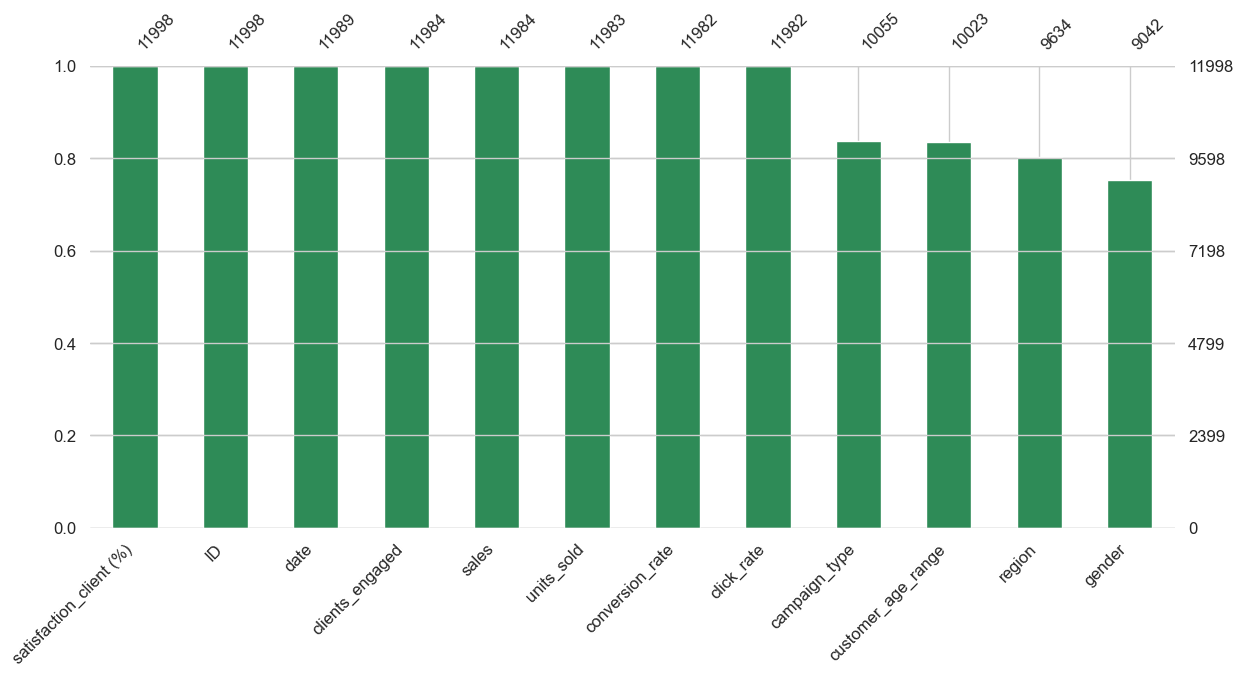

In [188]:
# visualize the missing values using missingo matrix
msno.bar(data, figsize=(14,6), fontsize=12, color="seagreen",  sort="descending")

In [189]:
data

,ID,date,campaign_type,region,customer_age_range,gender,sales,units_sold,clients_engaged,click_rate,conversion_rate,satisfaction_client (%)
0,Kq6531,2019-02-19,Online Advertising,East,56+,Male,100735.32,64.0,2364.0,0.13,0.13,92.2
1,Zh5785,2019-04-08,Online Advertising,North,56+,Female,15722.29,77.0,684.0,0.24,0.13,72.6
2,Si1260,2018-06-28,TV,NaN,26-35,NaN,35385.73,1.0,2299.0,0.51,0.08,55.0
3,Hl5016,2019-06-10,NaN,West,NaN,NaN,116045.50,44.0,2332.0,0.97,0.09,68.0
4,Dj9025,2018-07-14,Email,East,36-45,NaN,65039.93,20.0,2564.0,0.36,0.26,50.8
...,...,...,...,...,...,...,...,...,...,...,...,...
11993,Kk3455,2018-07-26,TV,East,46-55,NaN,79508.92,80.0,2203.0,1.29,0.27,55.4
11994,Yd3578,2021-09-27,Direct Advertising,East,NaN,Others,102306.08,52.0,2386.0,0.41,0.05,70.4
11995,Ao1925,2019-06-01,Direct Advertising,NaN,NaN,Male,117407.35,65.0,2511.0,0.64,0.25,70.0
11996,Vf8403,2020-07-21,NaN,East,46-55,Male,4728.01,59.0,2736.0,0.08,0.08,30.0


#### 1. Implementing MICE algorithm for filling the missing values in categorical columns


In [190]:
# Implementation of the MICE algorithm for categorical variables
def MiceAlgorithm(col):
    # change the values categ to numbers 
    le = preprocessing.LabelEncoder()
    impute_col = col
    impute_col_encoded = col

    le.fit(data.loc[:,impute_col])
    LabelEncoder()

    # label mapping
    dict(zip(le.classes_,le.transform(le.classes_)))
    d = dict(zip(le.classes_,le.transform(le.classes_)))[np.nan]
    print(d)
    data[impute_col_encoded] = le.transform(data[impute_col])

    # Replace the 4 mapped to NaN to NaN in the encoded column
    data[impute_col_encoded] = data[impute_col_encoded].map(lambda x: np.nan if x==d else x)
    # data.head()


    # Start MICE imputation
    imputer  = IterativeImputer(random_state=100)
    train = data.loc[:,['sales','clients_engaged','click_rate','conversion_rate',impute_col_encoded]]
    imputer.fit(train)
    IterativeImputer(random_state=100)
    data_imputed = imputer.transform(train)
    # data_imputed
    # Rounding the data 
    np.round(data_imputed)
    # Replace with the imputed values
    data.loc[:,[impute_col_encoded]] = data_imputed[:,4].round()
    # Inverse transformation to categorical values
    gender_imputed = list(le.inverse_transform(data[impute_col_encoded].round().astype(int)))
    data[impute_col_encoded] = gender_imputed



In [191]:
MiceAlgorithm('campaign_type')
data.head()

5


,ID,date,campaign_type,region,customer_age_range,gender,sales,units_sold,clients_engaged,click_rate,conversion_rate,satisfaction_client (%)
0,Kq6531,2019-02-19,Online Advertising,East,56+,Male,100735.32,64.0,2364.0,0.13,0.13,92.2
1,Zh5785,2019-04-08,Online Advertising,North,56+,Female,15722.29,77.0,684.0,0.24,0.13,72.6
2,Si1260,2018-06-28,TV,NaN,26-35,NaN,35385.73,1.0,2299.0,0.51,0.08,55.0
3,Hl5016,2019-06-10,Online Advertising,West,NaN,NaN,116045.50,44.0,2332.0,0.97,0.09,68.0
4,Dj9025,2018-07-14,Email,East,36-45,NaN,65039.93,20.0,2564.0,0.36,0.26,50.8


In [192]:
MiceAlgorithm('customer_age_range')
data.head()

5


,ID,date,campaign_type,region,customer_age_range,gender,sales,units_sold,clients_engaged,click_rate,conversion_rate,satisfaction_client (%)
0,Kq6531,2019-02-19,Online Advertising,East,56+,Male,100735.32,64.0,2364.0,0.13,0.13,92.2
1,Zh5785,2019-04-08,Online Advertising,North,56+,Female,15722.29,77.0,684.0,0.24,0.13,72.6
2,Si1260,2018-06-28,TV,NaN,26-35,NaN,35385.73,1.0,2299.0,0.51,0.08,55.0
3,Hl5016,2019-06-10,Online Advertising,West,36-45,NaN,116045.50,44.0,2332.0,0.97,0.09,68.0
4,Dj9025,2018-07-14,Email,East,36-45,NaN,65039.93,20.0,2564.0,0.36,0.26,50.8


In [193]:
MiceAlgorithm('region')
data.head()


4


,ID,date,campaign_type,region,customer_age_range,gender,sales,units_sold,clients_engaged,click_rate,conversion_rate,satisfaction_client (%)
0,Kq6531,2019-02-19,Online Advertising,East,56+,Male,100735.32,64.0,2364.0,0.13,0.13,92.2
1,Zh5785,2019-04-08,Online Advertising,North,56+,Female,15722.29,77.0,684.0,0.24,0.13,72.6
2,Si1260,2018-06-28,TV,South,26-35,NaN,35385.73,1.0,2299.0,0.51,0.08,55.0
3,Hl5016,2019-06-10,Online Advertising,West,36-45,NaN,116045.50,44.0,2332.0,0.97,0.09,68.0
4,Dj9025,2018-07-14,Email,East,36-45,NaN,65039.93,20.0,2564.0,0.36,0.26,50.8


In [194]:
# Apply the algorithm on the categorical data that includes missing values
MiceAlgorithm('gender')
data.head()

3


,ID,date,campaign_type,region,customer_age_range,gender,sales,units_sold,clients_engaged,click_rate,conversion_rate,satisfaction_client (%)
0,Kq6531,2019-02-19,Online Advertising,East,56+,Male,100735.32,64.0,2364.0,0.13,0.13,92.2
1,Zh5785,2019-04-08,Online Advertising,North,56+,Female,15722.29,77.0,684.0,0.24,0.13,72.6
2,Si1260,2018-06-28,TV,South,26-35,Male,35385.73,1.0,2299.0,0.51,0.08,55.0
3,Hl5016,2019-06-10,Online Advertising,West,36-45,Male,116045.50,44.0,2332.0,0.97,0.09,68.0
4,Dj9025,2018-07-14,Email,East,36-45,Male,65039.93,20.0,2564.0,0.36,0.26,50.8


#### 2. Imputation using the mean

In [195]:
missing_cols = ['sales', 'units_sold', 'clients_engaged', 'click_rate', 'conversion_rate']

# Mean imputation
for col in missing_cols:
    data[col].fillna(data[col].mean(), inplace=True)

data    

,ID,date,campaign_type,region,customer_age_range,gender,sales,units_sold,clients_engaged,click_rate,conversion_rate,satisfaction_client (%)
0,Kq6531,2019-02-19,Online Advertising,East,56+,Male,100735.32,64.0,2364.0,0.13,0.13,92.2
1,Zh5785,2019-04-08,Online Advertising,North,56+,Female,15722.29,77.0,684.0,0.24,0.13,72.6
2,Si1260,2018-06-28,TV,South,26-35,Male,35385.73,1.0,2299.0,0.51,0.08,55.0
3,Hl5016,2019-06-10,Online Advertising,West,36-45,Male,116045.50,44.0,2332.0,0.97,0.09,68.0
4,Dj9025,2018-07-14,Email,East,36-45,Male,65039.93,20.0,2564.0,0.36,0.26,50.8
...,...,...,...,...,...,...,...,...,...,...,...,...
11993,Kk3455,2018-07-26,TV,East,46-55,Male,79508.92,80.0,2203.0,1.29,0.27,55.4
11994,Yd3578,2021-09-27,Direct Advertising,East,36-45,Others,102306.08,52.0,2386.0,0.41,0.05,70.4
11995,Ao1925,2019-06-01,Direct Advertising,South,36-45,Male,117407.35,65.0,2511.0,0.64,0.25,70.0
11996,Vf8403,2020-07-21,Online Advertising,East,46-55,Male,4728.01,59.0,2736.0,0.08,0.08,30.0


#### 3. Drop rows with nan value on the column date

In [196]:
# Deleting the rows where the 'date' value is nan
data.dropna(subset=['date'], inplace=True)
data.head()

,ID,date,campaign_type,region,customer_age_range,gender,sales,units_sold,clients_engaged,click_rate,conversion_rate,satisfaction_client (%)
0,Kq6531,2019-02-19,Online Advertising,East,56+,Male,100735.32,64.0,2364.0,0.13,0.13,92.2
1,Zh5785,2019-04-08,Online Advertising,North,56+,Female,15722.29,77.0,684.0,0.24,0.13,72.6
2,Si1260,2018-06-28,TV,South,26-35,Male,35385.73,1.0,2299.0,0.51,0.08,55.0
3,Hl5016,2019-06-10,Online Advertising,West,36-45,Male,116045.50,44.0,2332.0,0.97,0.09,68.0
4,Dj9025,2018-07-14,Email,East,36-45,Male,65039.93,20.0,2564.0,0.36,0.26,50.8


In [197]:
data.isnull().sum().sum()

0

### Outliers detection

In [198]:
# Function to detect outliers in a DataFrame using quantile regression method
def detect_outliers(df):
    outlier_indices = []

    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
            outlier_indices.extend(outliers)

    outlier_indices = list(set(outlier_indices))
    return df.iloc[outlier_indices]

# Detecting outliers
outliers_df = detect_outliers(data)
print("Outliers in the dataset:")
print(outliers_df)

Outliers in the dataset:
Empty DataFrame
Columns: [ID, date, campaign_type, region, customer_age_range, gender, sales, units_sold, clients_engaged, click_rate, conversion_rate, satisfaction_client (%)]
Index: []


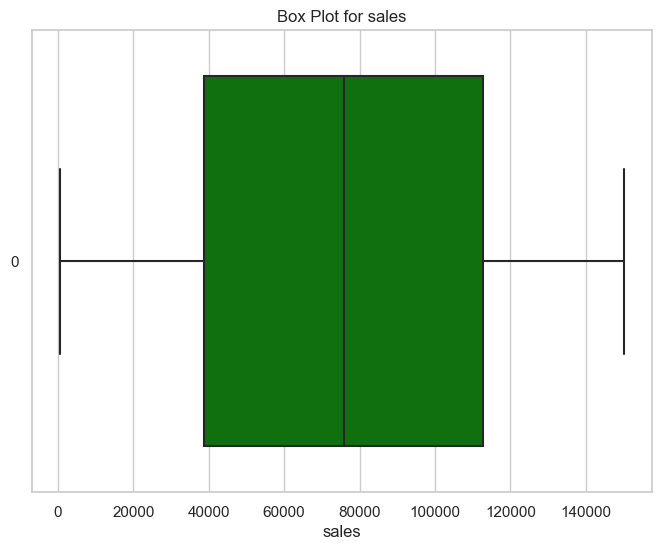

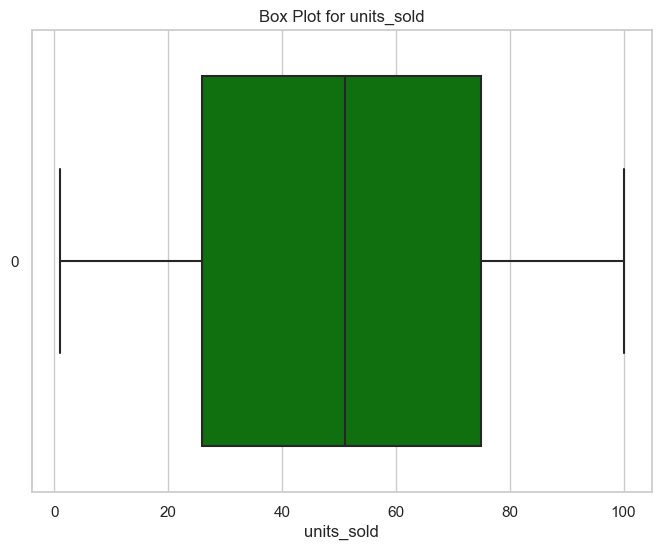

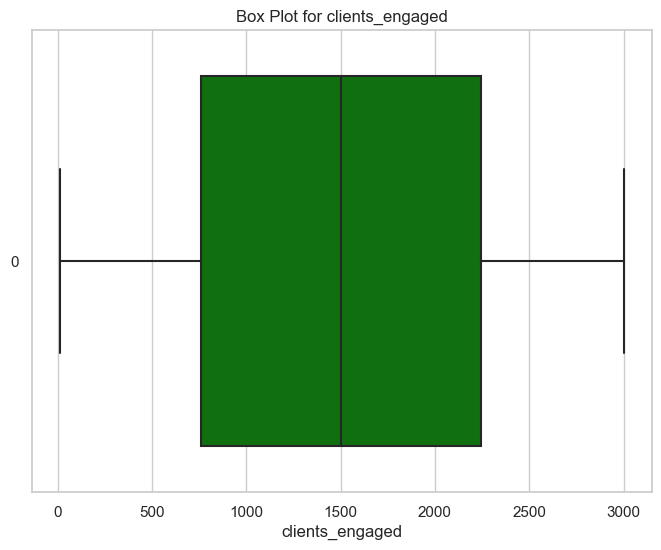

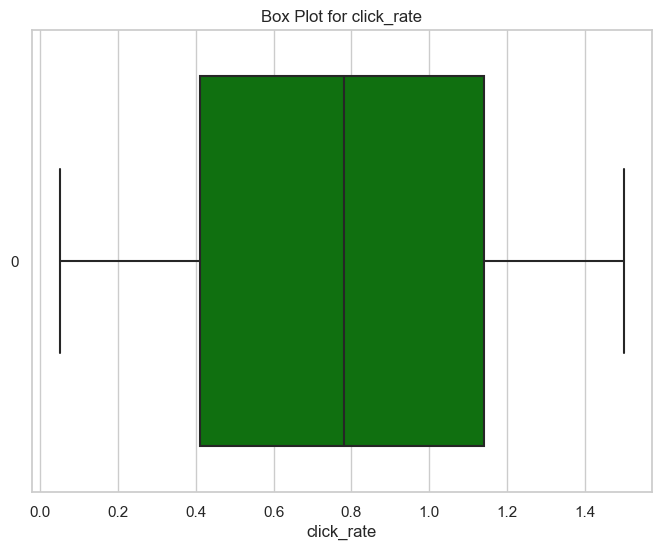

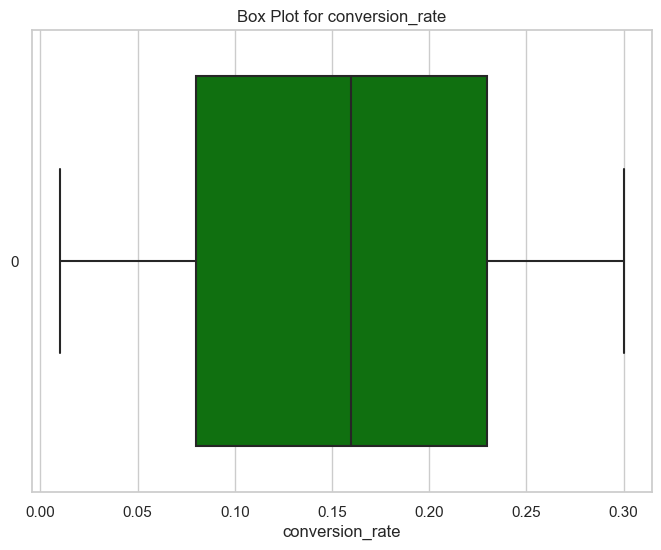

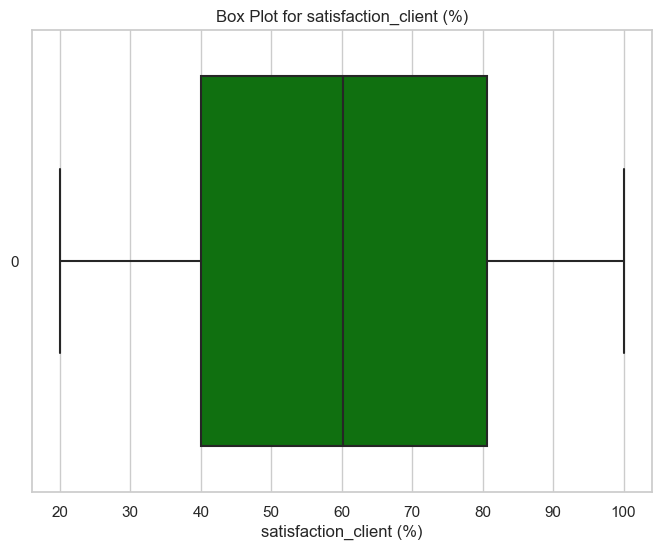

In [199]:
# Visualizing outliers
def plot_outliers(df):
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df[column], orient='h',color='green')
        plt.title(f'Box Plot for {column}')
        plt.xlabel(column)
        plt.show()
plot_outliers(data)  

#### Typos detection using unique values 

In [200]:
for column in data.columns:
    print("Unique date formats in the column:", data[column].unique())
# no typos detected

Unique date formats in the column: ['Kq6531' 'Zh5785' 'Si1260' ... 'Ao1925' 'Vf8403' 'Ap3780']
Unique date formats in the column: ['2019-02-19' '2019-04-08' '2018-06-28' ... '2018-10-12' '2019-11-18'
 '2019-05-16']
Unique date formats in the column: ['Online Advertising' 'TV' 'Email' 'Social Networks' 'Direct Advertising']
Unique date formats in the column: ['East' 'North' 'South' 'West']
Unique date formats in the column: ['56+' '26-35' '36-45' '18-25' '46-55']
Unique date formats in the column: ['Male' 'Female' 'Others']
Unique date formats in the column: [100735.32  15722.29  35385.73 ... 117407.35   4728.01  36322.69]
Unique date formats in the column: [ 64.          77.           1.          44.          20.
   2.          14.          67.          33.          81.
  51.          85.           3.          78.          82.
  40.          90.          32.          69.          79.
  65.          71.          16.          31.          97.
  63.          49.          72.          25. 

## Aggregation And Analysis of the Data

In [201]:
statistics = data.groupby(['campaign_type','region']).agg({'sales': ['sum', 'mean', 'median'],'units_sold': ['sum', 'mean', 'median'],
'clients_engaged': ['sum', 'mean', 'median'],
'click_rate': ['mean'],
'conversion_rate': ['mean'],
'satisfaction_client (%)': ['mean']
})

statistics.columns = ['Total Sales', 'Average Sales', 'Median Sales','Total Units Sold', 'Average Units Sold', 'Median Units Sold','Total Clients Engaged', 'Average Clients Engaged', 'Median Clients Engaged','Mean Click Rate', 'Mean Conversion Rate', 'Mean Satisfaction Rate']

statistics.reset_index(inplace=True)
print(statistics)

         campaign_type region   Total Sales  Average Sales  Median Sales  \
0   Direct Advertising   East  3.583212e+07   76892.971717    77626.7150   
1   Direct Advertising  North  4.954494e+07   75296.253921    75388.4950   
2   Direct Advertising  South  3.814813e+07   73645.033460    73563.9050   
3   Direct Advertising   West  2.885169e+07   72491.671789    72597.0100   
4                Email   East  2.878335e+07   75152.349991    73281.7000   
5                Email  North  5.306953e+07   75382.856491    77893.9600   
6                Email  South  3.695024e+07   78284.397161    81014.2550   
7                Email   West  2.934986e+07   72290.291951    73273.1700   
8   Online Advertising   East  6.244167e+07   77088.483210    75792.2100   
9   Online Advertising  North  1.026149e+08   74737.745976    75617.9122   
10  Online Advertising  South  7.626984e+07   77510.001212    78550.6700   
11  Online Advertising   West  6.109327e+07   77333.251177    75072.5900   
12     Socia

In [202]:
#Compaing Type
campaign_statistics = data.groupby('campaign_type').agg({'sales': ['sum', 'mean', 'median'],'units_sold': ['sum', 'mean', 'median'],
'clients_engaged': ['sum', 'mean', 'median'],
'click_rate': ['mean'],
'conversion_rate': ['mean'],
'satisfaction_client (%)': ['mean']
})

campaign_statistics.columns = ['Total Sales', 'Average Sales', 'Median Sales','Total Units Sold', 'Average Units Sold', 'Median Units Sold','Total Clients Engaged', 'Average Clients Engaged', 'Median Clients Engaged','Mean Click Rate', 'Average Conversion Rate', 'Average Customer Satisfaction']
campaign_statistics.reset_index(inplace=True)

print(campaign_statistics)

        campaign_type   Total Sales  Average Sales  Median Sales  \
0  Direct Advertising  1.523769e+08   74694.545394     74823.795   
1               Email  1.481530e+08   75395.916035     76657.880   
2  Online Advertising  3.024197e+08   76426.511561     76066.460   
3     Social Networks  1.541837e+08   76027.460105     76807.010   
4                  TV  1.496224e+08   74848.619359     74561.950   

   Total Units Sold  Average Units Sold  Median Units Sold  \
0     102569.920971           50.279373          50.320162   
1      99235.280648           50.501415          51.000000   
2     202239.561295           51.109315          52.000000   
3     102296.280648           50.441953          50.640324   
4     100713.561295           50.381972          51.000000   

   Total Clients Engaged  Average Clients Engaged  Median Clients Engaged  \
0           3.109408e+06              1524.219600             1580.000000   
1           2.987425e+06              1520.318058             15

In [203]:
#Region
region_statistics = data.groupby('region').agg({'sales': ['sum', 'mean', 'median'],'units_sold': ['sum', 'mean', 'median'],
'clients_engaged': ['sum', 'mean', 'median'],
'click_rate': ['mean'],
'conversion_rate': ['mean'],
'satisfaction_client (%)': ['mean']
})

region_statistics.columns = ['Total Sales', 'Average Sales', 'Median Sales','Total Units Sold', 'Average Units Sold', 'Median Units Sold','Total Clients Engaged', 'Average Clients Engaged', 'Median Clients Engaged', 'Mean Click Rate', 'Average Conversion Rate', 'Average Customer Satisfaction']

region_statistics.reset_index(inplace=True)

print(region_statistics)

  region   Total Sales  Average Sales  Median Sales  Total Units Sold  \
0   East  1.867144e+08   75470.669992     74569.350     124143.640324   
1  North  3.110936e+08   74998.456416     75591.920     212541.841943   
2  South  2.292042e+08   76733.918048     78290.240     151207.561295   
3   West  1.797434e+08   75522.430700     75158.035     119161.561295   

   Average Units Sold  Median Units Sold  Total Clients Engaged  \
0           50.179321               51.0           3.605817e+06   
1           51.239595               52.0           5.622910e+06   
2           50.621882               50.0           5.158595e+06   
3           50.067883               50.0           3.588177e+06   

   Average Clients Engaged  Median Clients Engaged  Mean Click Rate  \
0              1457.484634                  1454.0         0.777717   
1              1355.571337                  1319.5         0.781080   
2              1727.015379                  1881.0         0.776224   
3             

In [204]:
avg_conversion_rate = statistics[['campaign_type', 'region', 'Mean Conversion Rate']]
avg_customer_satisfaction = statistics[['campaign_type', 'region', 'Mean Satisfaction Rate']]
print("Average Conversion Rate by Campaign Type and Region:")
print(avg_conversion_rate)
print("\nAverage Customer Satisfaction by Campaign Type and Region:")
print(avg_customer_satisfaction)

Average Conversion Rate by Campaign Type and Region:
         campaign_type region  Mean Conversion Rate
0   Direct Advertising   East              0.155021
1   Direct Advertising  North              0.160957
2   Direct Advertising  South              0.158872
3   Direct Advertising   West              0.157653
4                Email   East              0.156527
5                Email  North              0.157593
6                Email  South              0.158072
7                Email   West              0.157798
8   Online Advertising   East              0.155725
9   Online Advertising  North              0.153478
10  Online Advertising  South              0.157018
11  Online Advertising   West              0.155418
12     Social Networks   East              0.153989
13     Social Networks  North              0.155961
14     Social Networks  South              0.155936
15     Social Networks   West              0.155065
16                  TV   East              0.153238
17         

## Visualization of Data Advanced

In [205]:
data

,ID,date,campaign_type,region,customer_age_range,gender,sales,units_sold,clients_engaged,click_rate,conversion_rate,satisfaction_client (%)
0,Kq6531,2019-02-19,Online Advertising,East,56+,Male,100735.32,64.0,2364.0,0.13,0.13,92.2
1,Zh5785,2019-04-08,Online Advertising,North,56+,Female,15722.29,77.0,684.0,0.24,0.13,72.6
2,Si1260,2018-06-28,TV,South,26-35,Male,35385.73,1.0,2299.0,0.51,0.08,55.0
3,Hl5016,2019-06-10,Online Advertising,West,36-45,Male,116045.50,44.0,2332.0,0.97,0.09,68.0
4,Dj9025,2018-07-14,Email,East,36-45,Male,65039.93,20.0,2564.0,0.36,0.26,50.8
...,...,...,...,...,...,...,...,...,...,...,...,...
11993,Kk3455,2018-07-26,TV,East,46-55,Male,79508.92,80.0,2203.0,1.29,0.27,55.4
11994,Yd3578,2021-09-27,Direct Advertising,East,36-45,Others,102306.08,52.0,2386.0,0.41,0.05,70.4
11995,Ao1925,2019-06-01,Direct Advertising,South,36-45,Male,117407.35,65.0,2511.0,0.64,0.25,70.0
11996,Vf8403,2020-07-21,Online Advertising,East,46-55,Male,4728.01,59.0,2736.0,0.08,0.08,30.0


<span>Time series plot of the sales</span>

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating 

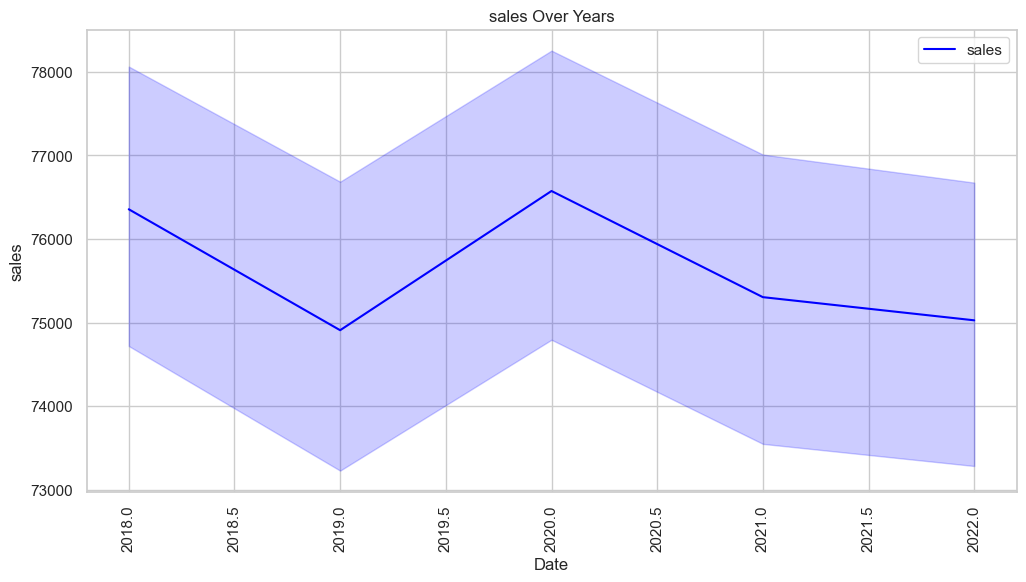

In [206]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
sns.set(style="whitegrid") 
data['year'] = data['date'].dt.year
plt.figure(figsize=(12, 6)) 
sns.lineplot(data=data, x='year', y='sales', label='sales', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('sales')
plt.title('sales Over Years')
plt.xticks(rotation=90)
plt.show()


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating 

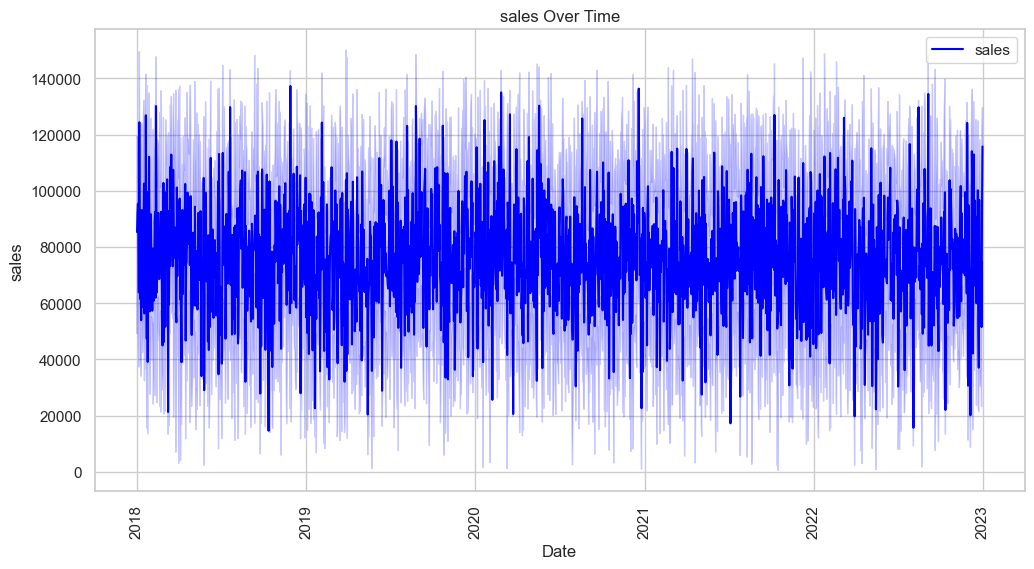

In [207]:
df = data.sort_values('date')
sns.set(style="whitegrid") 
plt.figure(figsize=(12, 6)) 
sns.lineplot(data=df, x='date', y='sales', label='sales', color='blue')
# Adding labels and title
plt.xlabel('Date')
plt.ylabel('sales')
plt.title('sales Over Time')
plt.xticks(rotation=90)
plt.show()


<span>Time series plot of the customer engagement</span>

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating 

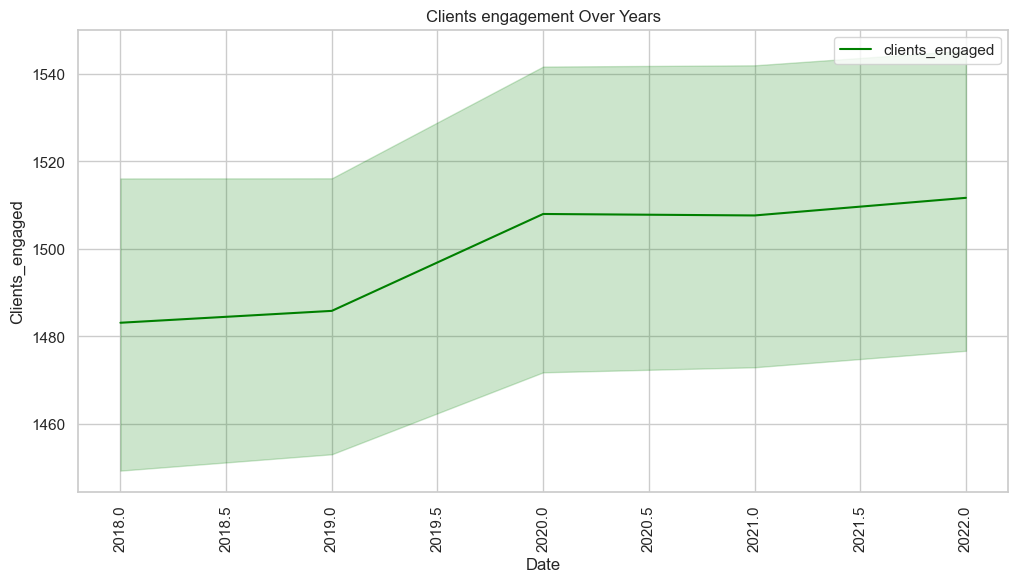

In [208]:
sns.set(style="whitegrid") 
plt.figure(figsize=(12, 6)) 
sns.lineplot(data=data, x='year', y='clients_engaged', label='clients_engaged', color='green')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Clients_engaged')
plt.title('Clients engagement Over Years')
plt.xticks(rotation=90)
plt.show()


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating 

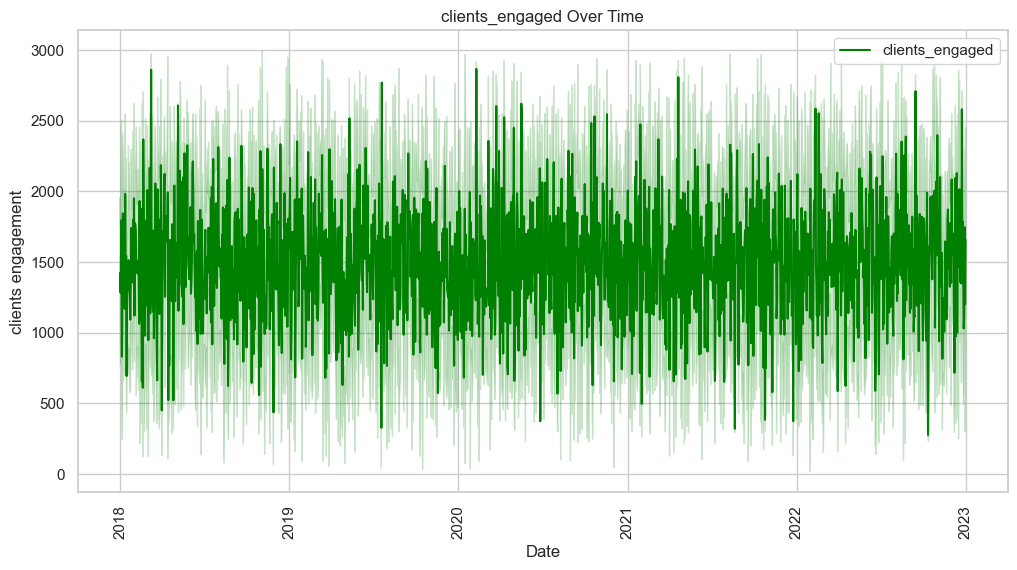

In [209]:
sns.set(style="whitegrid") 
plt.figure(figsize=(12, 6)) 
sns.lineplot(data=df, x='date', y='clients_engaged', label='clients_engaged', color='green')
# Adding labels and title
plt.xlabel('Date')
plt.ylabel('clients engagement')
plt.title('clients_engaged Over Time')
plt.xticks(rotation=90)
plt.show()

In [210]:
data.drop(columns='year',axis=1,inplace=True)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

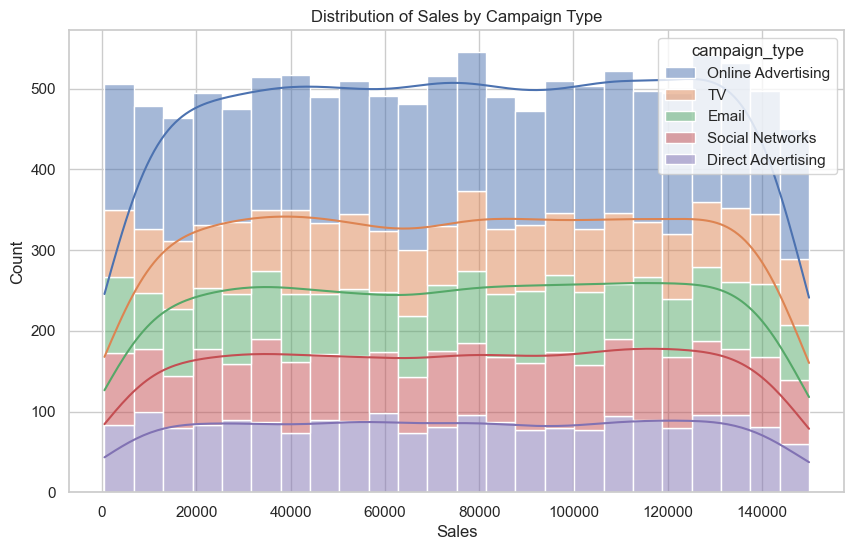

In [211]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='sales', hue='campaign_type', kde=True, multiple='stack')
plt.title('Distribution of Sales by Campaign Type')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

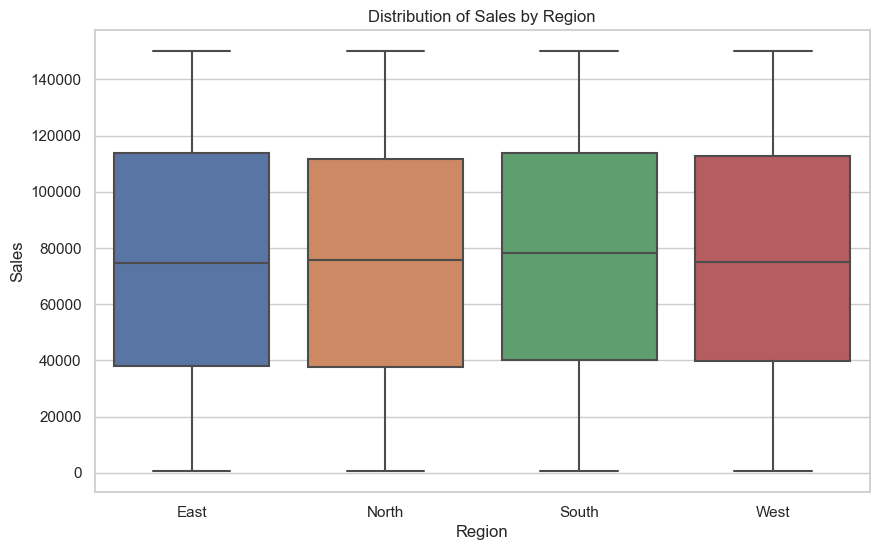

In [212]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='sales', data=data)
plt.title('Distribution of Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

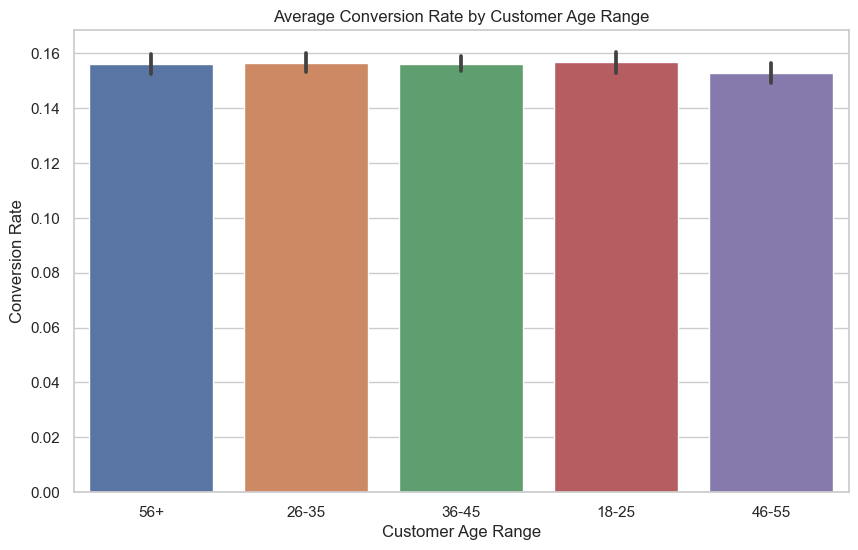

In [213]:
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_age_range', y='conversion_rate', data=data)
plt.title('Average Conversion Rate by Customer Age Range')
plt.xlabel('Customer Age Range')
plt.ylabel('Conversion Rate')
plt.show()

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

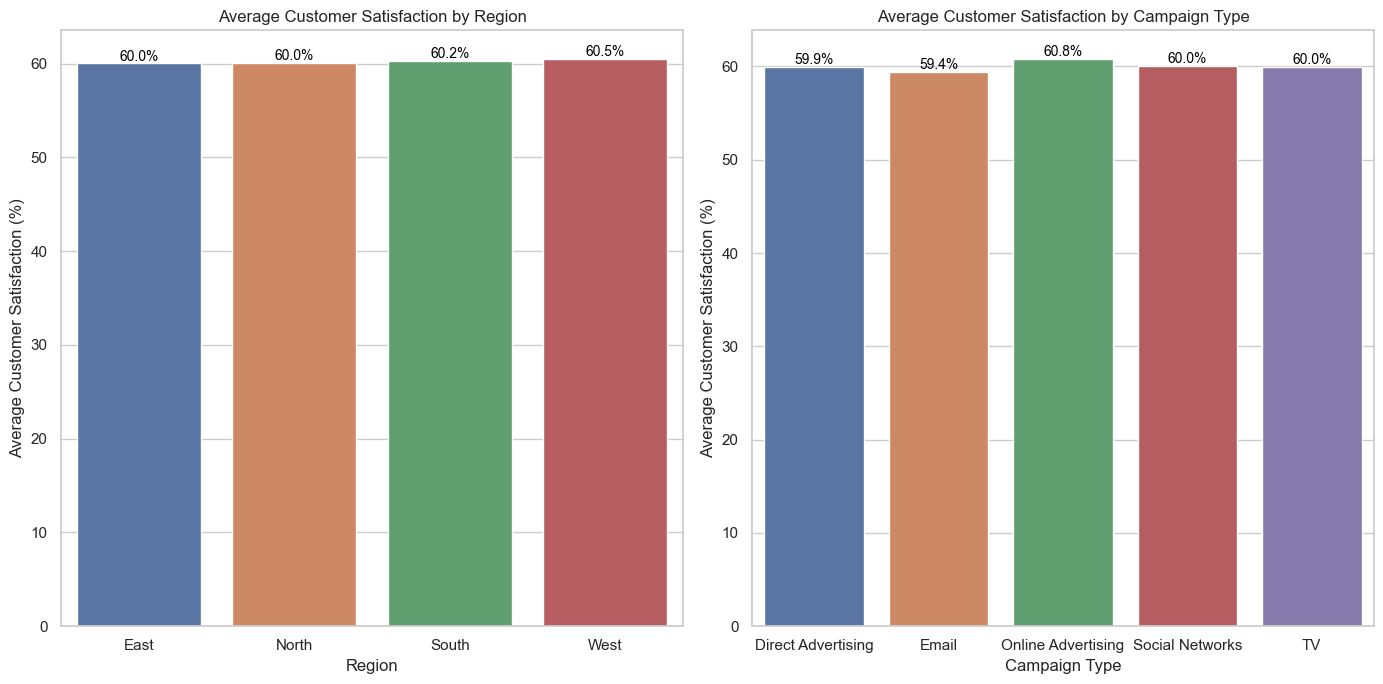

In [214]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x='region', y='Average Customer Satisfaction', data=region_statistics)
plt.title('Average Customer Satisfaction by Region')
plt.xlabel('Region')
plt.ylabel('Average Customer Satisfaction (%)')

for p in plt.gca().patches:
    plt.gca().annotate('{:.1f}%'.format(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.subplot(1, 2, 2)
sns.barplot(x='campaign_type', y='Average Customer Satisfaction', data=campaign_statistics)
plt.title('Average Customer Satisfaction by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Average Customer Satisfaction (%)')

for p in plt.gca().patches:
    plt.gca().annotate('{:.1f}%'.format(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.tight_layout()

plt.show()